In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# remove categorical data
# normalise numerical columns values
heart_df.drop(columns=['cp', 'restecg', 'exang', 'fbs', 'slope'])
scaler = StandardScaler()
heart_df.iloc[:,:-1] = scaler.fit_transform(heart_df.iloc[:,:-1])

/Users/geo/.virtualenvs/michigan/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/geo/.virtualenvs/michigan/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
# split data into training and test sets
# set random_state to a value (0) so the results can be reproduced
X_train, X_test, y_train, y_test = train_test_split(heart_df.iloc[:,:-1],
                                                    heart_df['target'],
                                                    random_state = 0)

In [5]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
pd.concat([X_test,
           y_test,
           pd.Series(y_pred, name = 'Prediction', index = X_test.index)],
          ignore_index = False, axis=1).head()

print("Train set score: {:.4f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))

Train set score: 0.8590
Test set score: 0.8421


In [6]:
# creating a list of K (number of neighbors), and keeping the odd ones
neighbors = list(filter(lambda x: x%2!=0,list(range(1,60))))
# list that will hold the cross validation scores
cv_scores = []
# get the whole dataset
X = heart_df.iloc[:,:12]
y = heart_df['target']

# perform 10-fold cross validation
# store the mean of all 10 cross validation scores for each K
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.7366765480895915, 0.7968873517786561, 0.7891304347826087, 0.8196146245059289, 0.8116600790513834, 0.8328557312252964, 0.8285079051383398, 0.8421442687747035, 0.8243577075098815, 0.828903162055336, 0.8292819499341239, 0.8247364953886693, 0.828903162055336, 0.8239789196310936, 0.8239789196310936, 0.8330698287220025, 0.828524374176548, 0.8332509881422924, 0.8287055335968379, 0.8287055335968379, 0.816024374176548, 0.8201910408432147, 0.8156455862977602, 0.8156455862977602, 0.8111001317523057, 0.8199934123847166, 0.8199934123847166, 0.8196146245059287, 0.8109189723320158, 0.8154644268774703]


In [7]:
# choose best K number of neighbors to maximize accuracy
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("Best score is {:.4f} for  K={}\n".format(max(cv_scores), optimal_k))

Best score is 0.8421 for  K=15



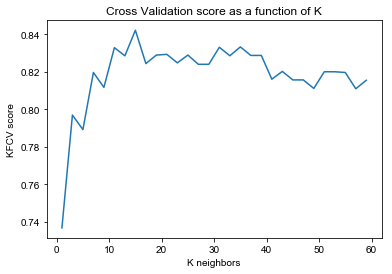

In [8]:
plt.plot(neighbors, cv_scores)
plt.xlabel('K neighbors')
plt.ylabel('KFCV score')
plt.title('Cross Validation score as a function of K')
sns.set_style("darkgrid")